# Characterization of an indoor environment

The VLC-RM Python package was created to estimate the DC gain, the interchannel interference, and the lighting parameters of a CSK system in rectangular empty rooms. To use this package, four modules must be imported.

In [1]:
# Import Transmitter
from vlc_rm.transmitter import Transmitter
# Import Photodetector
from vlc_rm.photodetector import Photodetector
# Import Indoor Environment
from vlc_rm.indoorenv import Indoorenv
# Import REcursiveModel
from vlc_rm.recursivemodel import Recursivemodel
# Import Symbol Constants
from vlc_rm.constants import Constants as Kt

# Import numpy
import numpy as np

#Import luxpy   
import luxpy as lx

# Import Matplotlob
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]


## Transmitter:
The transmitter of a system is defined from a set of parameters as follows:

In [2]:
transmitter = Transmitter(
            "Led1",
            position=[2.5, 2.5, 3],
            normal=[0, 0, -1],
            mlambert=1,
            wavelengths=[620, 530, 475],
            fwhm=[20, 30, 20],
            modulation='ieee16',
            luminous_flux=5000
                    )
print(transmitter)


 List of parameters for LED transmitter: 
Name: Led1
Position [x y z]: [2.5000e+00 2.5000e+00 3.0000e+00] 
Normal Vector [x y z]: [[0.0000e+00 0.0000e+00 -1.0000e+00]] 
Lambert Number: 1.0 
Central Wavelengths [nm]: [6.2000e+02 5.3000e+02 4.7500e+02] 
FWHM [nm]: [2.0000e+01 3.0000e+01 2.0000e+01]
Luminous Flux [lm]: 5000.0
ILER [W/lm]: 
 [[3.8001e-03 0.0000e+00 0.0000e+00]
 [0.0000e+00 1.8197e-03 0.0000e+00]
 [0.0000e+00 0.0000e+00 1.1960e-02]] 
Average Power per Channel Color: 
 [6.3336e+00 3.0328e+00 1.9934e+01] 
Total Power emmited by the Transmitter [W]: 
 29.30032767693627 



Once the transmitter is defined, the spectral power distribution and the spatial power distribution can be plotted.

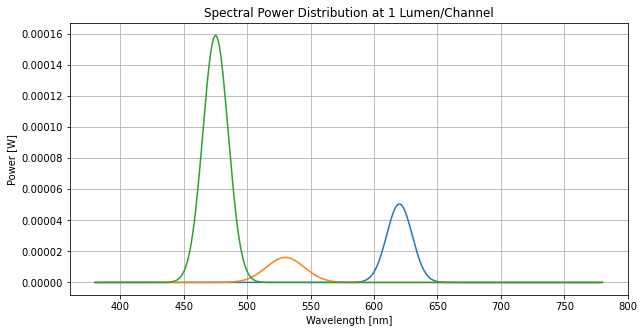

In [3]:
# transmitter.plot_spd_normalized()
transmitter.plot_spd_at_1lm()
# transmitter.plot_spatial_distribution()

## Photodetector

The second device is the photodetector. It is defined as:

In [4]:
pd = Photodetector(
    "PD1",
    position=[1.5, 1.5, 0.85],
    normal=[0, 0, 1],
    area=(1e-6)/3,
    #area=1e-4,
    fov=85,
    sensor='S10917-35GT',
    idark=1e-12
            )
print(pd)


 List of parameters for photodetector PD1: 
Name: PD1 
Position [x y z]: [1.5000e+00 1.5000e+00 8.5000e-01] 
Normal Vector [x y z]: [[0.0000e+00 0.0000e+00 1.0000e+00]] 
Active Area[m2]: 3.3333333249174757e-07 
FOV: 85.0 
Sensor: S10917-35GT


The sensor parameter is the reference of a commercial Hamamatsu RGB color sensor. According with  the manufacturer this sensor has three photodector with an active area 0.33e-6 [m^2] per detector, a dark current equal to 1-pA. The spectral responsivity of this device can be plotted by the following:

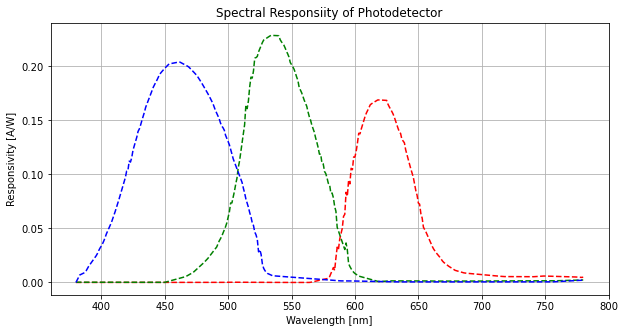

In [5]:
pd.plot_responsivity()

## Indoor Environment

The indoor space for VLC is defined by using the 'IndoorEnv' module. The 'no_reflections' parameter specifies the order of reflection to compute the  lighting parameters and the interchannel interference. With the VLC-RM package, the reflectance of each wall can be defined at the central wavelengths. The 'resolution' parameter determines the length of the small square area. THe method 'create_environment()' are used to create a grid of points and two pairwise parameters of the indoor environment.

In [6]:
room = Indoorenv(
        "Room",
        size=[5, 5, 3],
        no_reflections=10,
        resolution=1/8,
        ceiling=[0.82, 0.71, 0.64],
        west=[0.82, 0.71, 0.64],
        north=[0.82, 0.71, 0.64],
        east=[0.82, 0.71, 0.64],
        south=[0.82, 0.71, 0.64],
        floor=[0.635, 0.61, 0.58]
            )
room.create_environment(transmitter, pd)


 Creating parameters of indoor environment ...
Parameters created!



## Simulation of multiple PD positions

The simulation of the indoor WDM-VLC is carried out by the 'RecursiveModel' module, which is defined the following.

In [7]:
# Define Channel Model
channel_model = Recursivemodel(
    "ChannelModelA",
    transmitter,
    pd,
    room
    )

To realize a simulation for multiple receiver positions, the 'create_environment()' method is used by setting a mode='modified'. The 'modified' option allows to change the position or the orientation of the transmitter and the detector without recalculating all parameters. A list with the different positions is defined and then the iterative calculation of the channel simulation is deployed.


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creati

/tmp/ipykernel_17715/4151087364.py:44: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


Text(0.5, 1.0, 'CIExy Color Diagram')

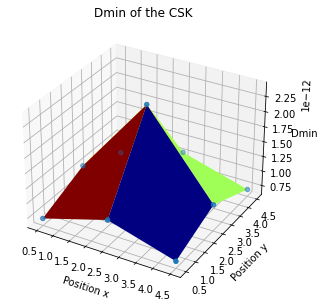

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


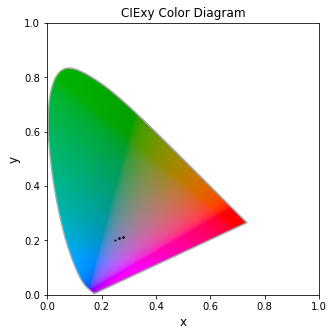

In [8]:
# Create x, y, z arrays
nx = 3
ny = 3
x = np.linspace(0.5, 4.5, nx)
y = np.linspace(0.5, 4.5, ny)

# Create a 3D meshgrid
X, Y = np.meshgrid(x, y)
Z = 0.85

position_list = []
dmin_list = []
xyz_list = []


for i in range(nx):
    for j in range(ny):
        # Define a photodetector position
        pd.position =  np.array([X[i,j], Y[i,j], Z])
        # Compute the paramteres of the indoor enviorment
        room.create_environment(transmitter, pd, mode='modified')        
        # Simulate indoor channel
        channel_model.simulate_channel()    
        # Print results of the simulation
        # print("Position:", pd.position)
        # print(channel_model.min_distance)
        # print(channel_model.illuminance)
        position_list.append(pd.position)
        dmin_list.append(channel_model.min_distance)
        xyz_list.append(channel_model.xyz)

dmin_points = np.array(dmin_list)
# print(dmin_points.reshape(nx, ny))

position_points = np.array(position_list)
# print(position_points[:, 0].reshape(nx, ny))
# print(position_points[:, 1].reshape(nx, ny))


# Using the collected data of the minimum distance is created a heatmap, 
# and plot the CIExy color space with the colorimetric point of the transmission:

figure = plt.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(
    X=position_points[:, 0].reshape(nx, ny), 
    Y=position_points[:, 1].reshape(nx, ny), 
    Z=dmin_points.reshape(nx, ny), 
    cmap='jet')
axis.scatter3D(
    xs=position_points[:, 0], 
    ys=position_points[:, 1], 
    zs=dmin_points
    )
axis.set_xlabel('Position x')
axis.set_ylabel('Position y')
axis.set_zlabel('Dmin')
plt.title("Dmin of the CSK")

#plt.figure(figsize=(100,100))
ax = lx.plot_chromaticity_diagram_colors()
xyz_points = np.array(xyz_list)
# print(xyz_points[:, 0, 0])
ax.scatter(
    x=xyz_points[:, 0, 0],
    y=xyz_points[:, 0, 1],
    s=1,
    c='black'
    )
plt.title("CIExy Color Diagram")
# Print the minimum distance 
# print(dmin_points)

## Simulation with Responsivity Modified

Responsivity loaded succesfully


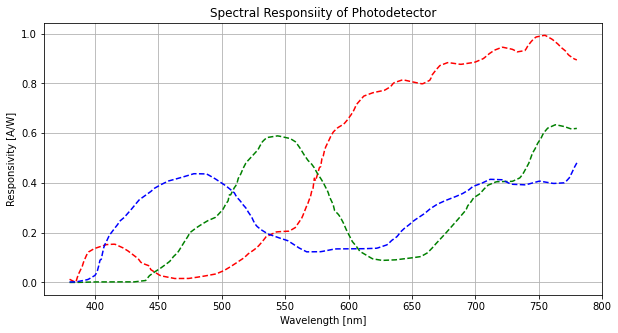


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creati

/tmp/ipykernel_17715/1102721520.py:51: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


Text(0.5, 0.92, "Dmin of the CSK PD's responsivity modified")

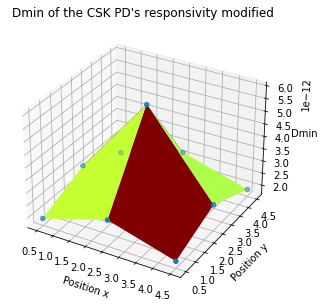

In [9]:
pd.sensor = 'TCS3103-04'
pd.plot_responsivity()

# Define Channel Model
channel_model = Recursivemodel(
    "ChannelModelA",
    transmitter,
    pd,
    room
    )

# Create x, y, z arrays
nx = 3
ny = 3
x = np.linspace(0.5, 4.5, nx)
y = np.linspace(0.5, 4.5, ny)

# Create a 3D meshgrid
X, Y = np.meshgrid(x, y)
Z = 0.85

position_list = []
dmin_list = []
xyz_list = []


for i in range(nx):
    for j in range(ny):
        # Define a photodetector position
        pd.position =  np.array([X[i,j], Y[i,j], Z])
        # Compute the paramteres of the indoor enviorment
        room.create_environment(transmitter, pd, mode='modified')        
        # Simulate indoor channel
        channel_model.simulate_channel()    
        # Print results of the simulation
        # print("Position:", pd.position)
        # print(channel_model.min_distance)
        # print(channel_model.illuminance)
        position_list.append(pd.position)
        dmin_list.append(channel_model.min_distance)
        xyz_list.append(channel_model.xyz)

dmin_points = np.array(dmin_list)
# print(dmin_points.reshape(nx, ny))

position_points = np.array(position_list)
# print(position_points[:, 0].reshape(nx, ny))
# print(position_points[:, 1].reshape(nx, ny))

figure = plt.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(
    X=position_points[:, 0].reshape(nx, ny), 
    Y=position_points[:, 1].reshape(nx, ny), 
    Z=dmin_points.reshape(nx, ny), 
    cmap='jet')
axis.scatter3D(
    xs=position_points[:, 0], 
    ys=position_points[:, 1], 
    zs=dmin_points
    )
axis.set_xlabel('Position x')
axis.set_ylabel('Position y')
axis.set_zlabel('Dmin')
plt.title("Dmin of the CSK PD's responsivity modified")

## Simulation with a PD's direction


 List of parameters for photodetector PD1: 
Name: PD1 
Position [x y z]: [4.5000e+00 4.5000e+00 8.5000e-01] 
Normal Vector [x y z]: [[0.0000e+00 0.0000e+00 -1.0000e+00]] 
Active Area[m2]: 3.3333333249174757e-07 
FOV: 85.0 
Sensor: S10917-35GT

 Creating parameters of indoor environment ...
Parameters created!


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


 Creating parameters of indoor environment ...
Parameters created!

/tmp/ipykernel_17715/2007461015.py:53: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


Text(0.5, 0.92, "Dmin of the CSK PD's FOV modified")

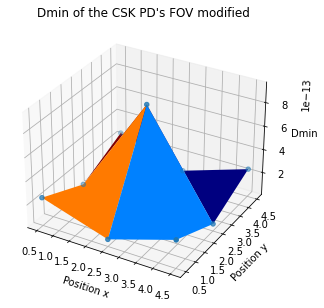

In [10]:
pd.normal=[0, 0, -1]
pd.sensor='S10917-35GT'
print(pd)
room.create_environment(transmitter, pd)

# Define Channel Model
channel_model = Recursivemodel(
    "ChannelModelA",
    transmitter,
    pd,
    room
    )

# Create x, y, z arrays
nx = 3
ny = 3
x = np.linspace(0.5, 4.5, nx)
y = np.linspace(0.5, 4.5, ny)

# Create a 3D meshgrid
X, Y = np.meshgrid(x, y)
Z = 0.85

position_list = []
dmin_list = []
xyz_list = []


for i in range(nx):
    for j in range(ny):
        # Define a photodetector position
        pd.position =  np.array([X[i,j], Y[i,j], Z])
        # Compute the paramteres of the indoor enviorment
        room.create_environment(transmitter, pd, mode='modified')        
        # Simulate indoor channel
        channel_model.simulate_channel()    
        # Print results of the simulation
        # print("Position:", pd.position)
        # print(channel_model.min_distance)
        # print(channel_model.illuminance)
        position_list.append(pd.position)
        dmin_list.append(channel_model.min_distance)
        xyz_list.append(channel_model.xyz)

dmin_points = np.array(dmin_list)
# print(dmin_points.reshape(nx, ny))

position_points = np.array(position_list)
# print(position_points[:, 0].reshape(nx, ny))
# print(position_points[:, 1].reshape(nx, ny))

figure = plt.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(
    X=position_points[:, 0].reshape(nx, ny), 
    Y=position_points[:, 1].reshape(nx, ny), 
    Z=dmin_points.reshape(nx, ny), 
    cmap='jet')
axis.scatter3D(
    xs=position_points[:, 0], 
    ys=position_points[:, 1], 
    zs=dmin_points
    )
axis.set_xlabel('Position x')
axis.set_ylabel('Position y')
axis.set_zlabel('Dmin')
plt.title("Dmin of the CSK PD's FOV modified")

## Simulation with a PD's field of view

In [ ]:
pd.fov=30
pd.normal=[0, 0, 1]
print(pd)
room.create_environment(transmitter, pd)

# Define Channel Model
channel_model = Recursivemodel(
    "ChannelModelA",
    transmitter,
    pd,
    room
    )

# Create x, y, z arrays
nx = 3
ny = 3
x = np.linspace(0.5, 4.5, nx)
y = np.linspace(0.5, 4.5, ny)

# Create a 3D meshgrid
X, Y = np.meshgrid(x, y)
Z = 0.85

position_list = []
dmin_list = []
xyz_list = []


for i in range(nx):
    for j in range(ny):
        # Define a photodetector position
        pd.position =  np.array([X[i,j], Y[i,j], Z])
        # Compute the paramteres of the indoor enviorment
        room.create_environment(transmitter, pd, mode='modified')        
        # Simulate indoor channel
        channel_model.simulate_channel()    
        # Print results of the simulation
        # print("Position:", pd.position)
        # print(channel_model.min_distance)
        # print(channel_model.illuminance)
        position_list.append(pd.position)
        dmin_list.append(channel_model.min_distance)
        xyz_list.append(channel_model.xyz)

dmin_points = np.array(dmin_list)
# print(dmin_points.reshape(nx, ny))

position_points = np.array(position_list)
# print(position_points[:, 0].reshape(nx, ny))
# print(position_points[:, 1].reshape(nx, ny))

figure = plt.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(
    X=position_points[:, 0].reshape(nx, ny), 
    Y=position_points[:, 1].reshape(nx, ny), 
    Z=dmin_points.reshape(nx, ny), 
    cmap='jet')
axis.scatter3D(
    xs=position_points[:, 0], 
    ys=position_points[:, 1], 
    zs=dmin_points
    )
axis.set_xlabel('Position x')
axis.set_ylabel('Position y')
axis.set_zlabel('Dmin')
plt.title("Dmin of the CSK PD's FOV modified")

## Simulation wall's reflectance modified:


In [ ]:
pd.fov=85

room.ceiling=[0.42, 0.38, 0.34]
room.west=[0.82, 0.50, 0.22]
room.north=[0.82, 0.71, 0.64]
room.east=[0.82, 0.50, 0.22]
room.south=[0.82, 0.71, 0.64]
room.floor=[0.635, 0.61, 0.58]

# Define Channel Model
channel_model = Recursivemodel(
    "ChannelModelA",
    transmitter,
    pd,
    room
    )

# Create x, y, z arrays
nx = 3
ny = 3
x = np.linspace(0.5, 4.5, nx)
y = np.linspace(0.5, 4.5, ny)

# Create a 3D meshgrid
X, Y = np.meshgrid(x, y)
Z = 0.85

position_list = []
dmin_list = []
xyz_list = []


for i in range(nx):
    for j in range(ny):
        # Define a photodetector position
        pd.position =  np.array([X[i,j], Y[i,j], Z])
        # Compute the paramteres of the indoor enviorment
        room.create_environment(transmitter, pd, mode='modified')        
        # Simulate indoor channel
        channel_model.simulate_channel()    
        # Print results of the simulation
        # print("Position:", pd.position)
        # print(channel_model.min_distance)
        # print(channel_model.illuminance)
        position_list.append(pd.position)
        dmin_list.append(channel_model.min_distance)
        xyz_list.append(channel_model.xyz)

dmin_points = np.array(dmin_list)
# print(dmin_points.reshape(nx, ny))

position_points = np.array(position_list)
# print(position_points[:, 0].reshape(nx, ny))
# print(position_points[:, 1].reshape(nx, ny))

figure = plt.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(
    X=position_points[:, 0].reshape(nx, ny), 
    Y=position_points[:, 1].reshape(nx, ny), 
    Z=dmin_points.reshape(nx, ny), 
    cmap='jet')
axis.scatter3D(
    xs=position_points[:, 0], 
    ys=position_points[:, 1], 
    zs=dmin_points
    )
axis.set_xlabel('Position x')
axis.set_ylabel('Position y')
axis.set_zlabel('Dmin')
plt.title("Dmin of the CSK with walls' reflectance modified")